<center><img src="http://mdst.eecs.umich.edu/images/mdst-logo-circle.png" width=350></center>

# Some More Data Visualization

The things we talked about last week about data visualization still hold.  Today we are going to be extending what we did last week to more powerful techniques.

Once again, communicating with your audience is the end goal of any data visualization.  A vanilla plot doesn't do much to that end:

In [11]:
%matplotlib inline
import seaborn
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

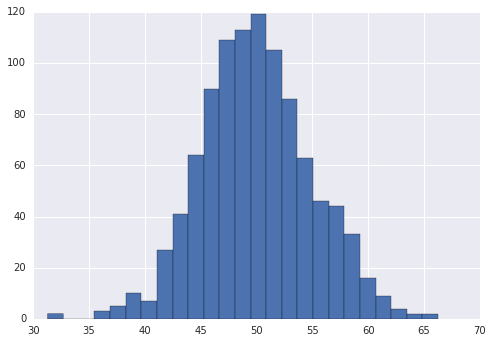

In [12]:
norm_rv = stats.norm(50,5)
draws = norm_rv.rvs(1000)

out = plt.hist(draws, bins=25)

How can we make this better?  Obviously, this is only simulated data, but what does it communicate?  What would we hope that a non-technical person takes from this?

Unfortunately, making these details work out the way you want them is can be somewhat time consuming, if only because it is hard to remember how to make matplotlib do what you want.

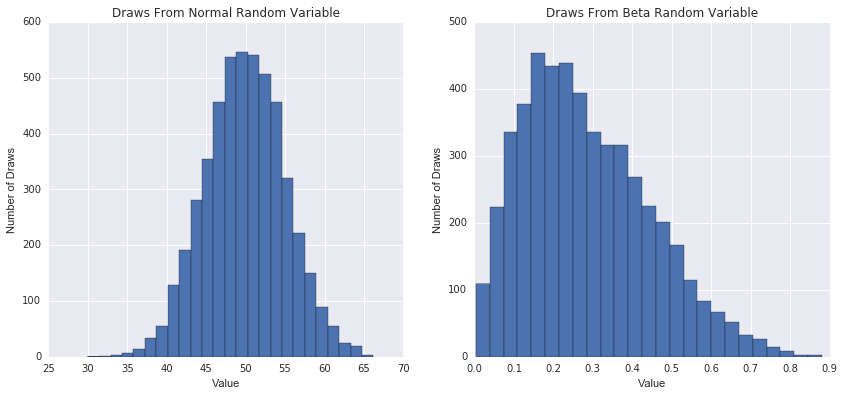

In [13]:
fig = plt.figure()
plt.subplot(121)
norm_rv = stats.norm(50,5)
draws = norm_rv.rvs(5000)

out = plt.hist(draws, bins=25)
plt.xlabel('Value')
plt.ylabel('Number of Draws')
plt.title('Draws From Normal Random Variable')

plt.subplot(122)

beta_rv = stats.beta(2,5)
draws = beta_rv.rvs(5000)

out = plt.hist(draws, bins=25)
plt.xlabel('Value')
plt.ylabel('Number of Draws')
plt.title('Draws From Beta Random Variable')

#plt.savefig('./plot.pdf')
fig.set_size_inches(14,6)

For an exercise, consult the matplotlib subplot documentation and add 2 more plots to make a 2x2 grid of plots.  Add the appropriate titles and axes.

Creating plots that look good and communicate can be difficult and often requires domain specific knowledge.  There is no one that knows everything about plotting.  There is a good deal of fragmentation in the open source community due to the specialization required.

Even if you learn a good way to convey information for your specific problem, that is no guarantee that the methods you use will be useful for the next problem that you work on.

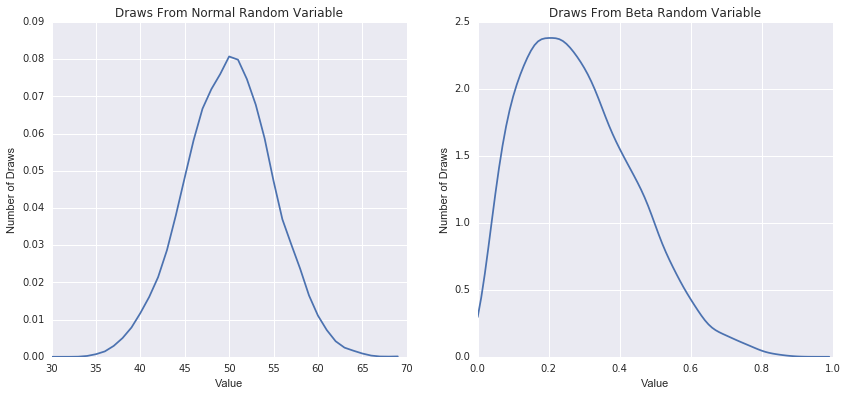

In [14]:
fig = plt.figure()
plt.subplot(121)
norm_rv = stats.norm(50,5)
draws = norm_rv.rvs(5000)

kern = stats.gaussian_kde(draws)
x = np.arange(30,70,1)
plt.plot(x, kern(x))
plt.xlabel('Value')
plt.ylabel('Number of Draws')
plt.title('Draws From Normal Random Variable')

plt.subplot(122)

beta_rv = stats.beta(2,5)
draws = beta_rv.rvs(5000)

kern = stats.gaussian_kde(draws)
x = np.arange(0,1,0.01)
plt.plot(x, kern(x))
plt.xlabel('Value')
plt.ylabel('Number of Draws')
plt.title('Draws From Beta Random Variable')

fig.set_size_inches(14,6)

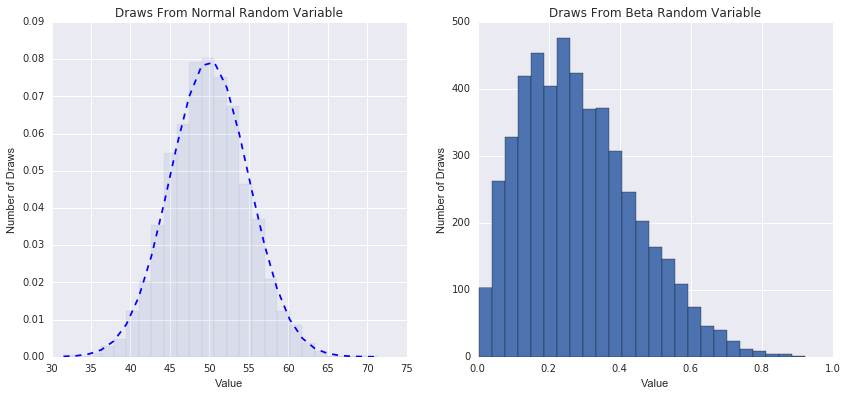

In [15]:
import matplotlib.mlab as mlab

fig = plt.figure()
plt.subplot(121)
norm_rv = stats.norm(50,5)
draws = norm_rv.rvs(5000)

out = plt.hist(draws, bins=25, normed=True, alpha=0.1)
f = mlab.normpdf(out[1], 50, 5)
plt.plot(out[1], f, 'b--')
plt.xlabel('Value')
plt.ylabel('Number of Draws')
plt.title('Draws From Normal Random Variable')

plt.subplot(122)

beta_rv = stats.beta(2,5)
draws = beta_rv.rvs(5000)

out = plt.hist(draws, bins=25)
plt.xlabel('Value')
plt.ylabel('Number of Draws')
plt.title('Draws From Beta Random Variable')

fig.set_size_inches(14,6)

# Maps

In this section we will talk about making some basic maps with the Flint data.  This requires some extra files, that can be found <a href="https://drive.google.com/file/d/0BzRxYn1fw92tSnh0MzJ6ZHl4ams/view?usp=sharing">here</a>
and
<a href="https://drive.google.com/file/d/0BzRxYn1fw92tcTJYakpyRUFQaFE/view?usp=sharing">here</a>.  You will need a directory called "maps" in your working directory.  The map template should be placed in the maps directory, while map utils should be in the working directory.


The linked files are some custom code that have been developed for the Flint project specifically.  If we load the Flint data, we can build a DataFrame and give it to our map utility functions to produce a map with points of interest indicated.  We will do that as follows below.

In [16]:
import pandas as pd

flint_df = pd.read_csv('./data/flint_train.csv')

In [21]:
import map_utils

# render_map_with_dataframe will map any dataframe that has a lat/lon data.  It also allows for color, size, and
# description.
mask = flint_df['Lead_(ppb)'] > 15
dangerous_lead_df = flint_df[mask][['Latitude', 'Longitude', 'Lead_(ppb)', 'SL_Lead']].copy()

In [24]:
def apply_color(val):
    if val == 1:
        return 'blue'
    if val == 0:
        return 'yellow'

dangerous_lead_df['description'] = dangerous_lead_df['Lead_(ppb)']
dangerous_lead_df['color'] = dangerous_lead_df['SL_Lead'].apply(apply_color)

map_utils.render_map_with_dataframe(dangerous_lead_df, 'dangerous_lead.html')

In [32]:
value_df = flint_df[['Latitude', 'Longitude', 'Land_Value']].copy()

def apply_color(val):
    if val < 25000:
        return 'blue'
    if np.logical_and(val > 25000, val < 75000):
        return 'red'
    if val > 75000:
        return 'yellow'

value_df['color'] = value_df['Land_Value'].apply(apply_color)
value_df['description'] = value_df['Land_Value']

In [33]:
map_utils.render_map_with_dataframe(value_df.sample(5000), 'home_value.html')